<a href="https://colab.research.google.com/github/jmarrietar/mineria-de-datos/blob/main/%5BProyecto%5D_Analisis_Exploratorio_%2B_Preprocesamiento_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Mineria de Datos

## Analisis Exploratorio de Datos (EDA) 

En este documento se presenta el análisis descriptivo y preprocesamiento del \textit{data set} del proyecto. Se exploraran las variables, valores nulos, tipos de datos, frecuencias, medidas de centralidad y demás métricas para maximizar el entendimiento del conjunto de datos a utilizar. Así como algunas transformaciones a las variables y creación de nuevas.

### Dataset (Online Retail)

Este dataset es originario del repositorio **UCI Irvine Machine Learning Repository**). Es llamada **Online Retail Dataset** y consiste en todas las compras realizadas por una empresa de comercio electrónico minorista en el Reino Unido (UK) durante un periodo de ocho meses. Este es un conjunto de datos transaccionales el cual contiene todas las transacciones ocurridas entre 01/12/2010 y 09/12/2011 para esta empresa. La empresa vende principalmente regalos únicos para todas las ocasiones. Muchos de los clientes son mayoristas. 
http://archive.ics.uci.edu/ml/datasets/Online+Retail

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np
import seaborn as sns
from os import path
from PIL import Image

import matplotlib.pyplot as plt
% matplotlib inline

pd.set_option('display.max_rows', 100)

In [21]:
!gdown https://drive.google.com/uc?id=1_AJd_FiQ6LSWSK4e__ccfLzhu_sWWNUS

Downloading...
From: https://drive.google.com/uc?id=1_AJd_FiQ6LSWSK4e__ccfLzhu_sWWNUS
To: /content/OnlineRetail.csv
45.6MB [00:00, 125MB/s]


In [22]:
online_retail = pd.read_csv(
    "OnlineRetail.csv",
    sep=",",
    dtype={"CustomerID": "object"},
    encoding="unicode_escape",
)

Este dataset originalmente se presenta a nivel de producto-transacción con 541909 filas y las columnas que se muestran a continuación:

* `InvoiceNo`: Numero de recibo. Nominal, un número entero de 6 dígitos asignado de forma única a cada transacción. Si este código comienza con la letra 'c', indica una cancelación.
* `StockCode`: Código del producto (Ítem). Nominal, un número entero de 5 dígitos asignado de forma única a cada producto diferente.
* `Description`: Nombre del Producto. Nominal.
* `Quantity`: Fecha de la Transacción. Date and time. 
* `InvoiceDate`: Invice Date and time. Numeric, the day and time when each transaction was generated.
* `UnitPrice`: Precio Unitario. Numérico, Precio del producto por unidad en libras esterlina. 
* `CustomerID`: ID identificador del cliente.  Nominal, Numero de 5 dígitos entero asignado de forma única a cada cliente. 
* `Country`: Nombre del País. Nominal. Nombre del pais donde reside el cliente. 

In [23]:
online_retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [24]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [25]:
len(online_retail)

541909

In [26]:
"""
!pip uninstall pandas-profiling
!pip install pandas-profiling[notebook,html]
"""

"""
from pandas_profiling import ProfileReport
online_retail_profile = ProfileReport(online_retail, title='Pandas Profiling Report', html={'style':{'full_width':True}})
online_retail_profile
"""

"\nfrom pandas_profiling import ProfileReport\nonline_retail_profile = ProfileReport(online_retail, title='Pandas Profiling Report', html={'style':{'full_width':True}})\nonline_retail_profile\n"

En el informe de perfil de Pandas, se puede ver que CustomerID tiene 135080 (24,9%) valores perdidos.

# Analisis a Nivel Transaction - Producto

#### Valores Nulos

In [27]:
online_retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### Frecuencias

In [28]:
products = (
    online_retail.groupby(["StockCode", "Description"])[["Quantity"]]
    .agg("sum")
    .reset_index()
)

In [29]:
products.sort_values(by=['Quantity'], ascending=False)[0:10]

,StockCode,Description,Quantity
3617,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
4197,85099B,JUMBO BAG RED RETROSPOT,47363
3956,84879,ASSORTED COLOUR BIRD ORNAMENT,36381
1333,22197,POPCORN HOLDER,36334
531,21212,PACK OF 72 RETROSPOT CAKE CASES,36039
4223,85123A,WHITE HANGING HEART T-LIGHT HOLDER,35025
2344,23084,RABBIT NIGHT LIGHT,30680
1630,22492,MINI PAINT SET VINTAGE,26437
1775,22616,PACK OF 12 LONDON TISSUES,26315
1122,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24753


### Quantity

Medida de centralidad 

In [30]:
online_retail_quantity_positive = online_retail[online_retail["Quantity"]>0]

threshold = 50
online_retail_quantity_positive = online_retail_quantity_positive[
    online_retail_quantity_positive["Quantity"] <= threshold
]

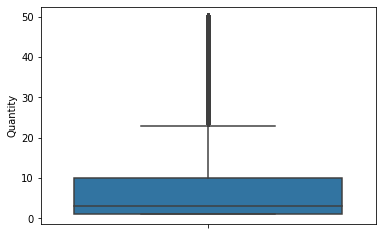

In [31]:
sns.boxplot(y=online_retail_quantity_positive["Quantity"])

In [32]:
online_retail_quantity_positive["Quantity"].quantile([.25, .5, 0.75, 0.95])

0.25     1.0
0.50     3.0
0.75    10.0
0.95    24.0
Name: Quantity, dtype: float64

Medidad de Dispersion 

In [33]:
# Desviacion estandard
online_retail_quantity_positive["Quantity"].std()

8.648952504638645

In [34]:
online_retail_quantity_positive["Quantity"].mean()

6.870602562397995

### Unit price 

Medida de centralidad

In [35]:
unit_price_positive = online_retail[online_retail["UnitPrice"]>0]

In [36]:
unit_price_positive = online_retail[online_retail["UnitPrice"]>0]

threshold = 25
unit_price_positive = unit_price_positive[
    unit_price_positive["UnitPrice"] <= threshold
]

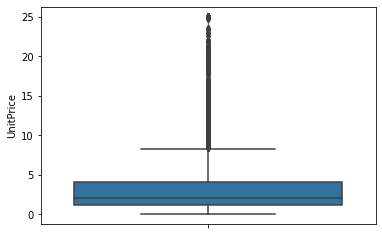

In [37]:
sns.boxplot(y=unit_price_positive['UnitPrice'])

In [38]:
unit_price_positive['UnitPrice'].quantile([.25, .5, 0.75, 0.95])

0.25    1.25
0.50    2.08
0.75    4.13
0.95    9.95
Name: UnitPrice, dtype: float64

Medidas de Dispersion 

In [39]:
# Desviacion standard
unit_price_positive['UnitPrice'].std()

3.246096969932633

In [40]:
unit_price_positive['UnitPrice'].mean()

3.2113943309013564

# 2. Pre-procesamiento

#### Creacion de Variables




* Se transforma la columna de fecha a un formato de datos adecuado, que nos permita manipularla y crear nuevas columnas posteriormente. 
* Se crea una columna adicional con solo el `año` y el `mes`.
* Se crea una nueva columna con el total de la compra de los productos



In [41]:
online_retail["InvoiceDate"] = pd.to_datetime(online_retail["InvoiceDate"])

# Create an additional column for date as year and month
online_retail["date"] = online_retail["InvoiceDate"].dt.strftime("%Y-%m")

# Create a new column for the total expenditure of that product in the purchase.
online_retail["total_sales_amount"] = (
    online_retail["UnitPrice"] * online_retail["Quantity"]
)

In [46]:
# Add column for cancelations 
online_retail['cancelation'] = online_retail['InvoiceNo'].apply(lambda x: x.startswith("C"))
online_retail['cancelation'] = online_retail['total_sales_amount'] <0

Primera fecha de compra en el dataset


In [42]:
min(online_retail['InvoiceDate'])

Timestamp('2010-12-01 08:26:00')

Ultima fecha de compra en el dataset 

In [43]:
max(online_retail['InvoiceDate'])

Timestamp('2011-12-09 12:50:00')

#### Limpieza de datos

A partir de las marcas de tiempo, podemos ver que el primero en nuestro conjunto de datos fue del 01-12-2010 a las 8 am y el último del 09-12-2011 a las 12:50 am. En este caso, para el mes de diciembre la informacion esta incompleta.

In [44]:
# Remove days from December 2011
online_retail = online_retail[online_retail.InvoiceDate < '2011-12-01']

Como el mes de diciembre esta incompleto, no se tiene en cuenta para el analisis ya que podria agregar ruido. 

In [45]:
# Remove rows were Unit price is 0.0
online_retail = online_retail[online_retail['UnitPrice'] !=0.0]

#### Normalizacion de Variables
Se crean variables adicionales normalizadas

In [47]:
new_min = 0
new_max = 1

min_X = np.min(online_retail["UnitPrice"])
max_X = np.max(online_retail["UnitPrice"])

In [48]:
online_retail["UnitPriceNorm"] = ((online_retail["UnitPrice"]-min_X)/(max_X - min_X))*(new_max - new_min) + new_min

In [49]:
new_min = 0
new_max = 1

min_X = np.min(online_retail["Quantity"])
max_X = np.max(online_retail["Quantity"])

online_retail["QuantityNorm"] = ((online_retail["Quantity"]-min_X)/(max_X - min_X))*(new_max - new_min) + new_min

### Filtrar cancelaciones

En el dataset existen transacciones que tienen un estado de cancelado, las cuales se analizaran por separado. 

In [50]:
# Only positive purchases (No cancelations)
online_retail_purchases = online_retail[online_retail['cancelation'] == False] 

In [51]:
# Group by Purchase (Invoice)
invoices = (
    online_retail_purchases.groupby(["InvoiceNo"])[["Quantity", "total_sales_amount"]]
    .agg("sum")
    .reset_index()
)

# Analisis a nivel de compras

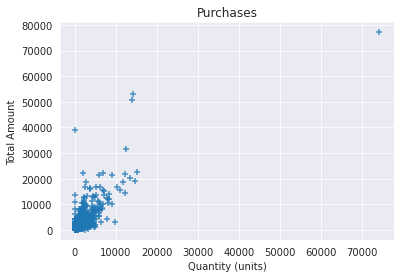

In [52]:
# Correlation Quantity & total_sales_amount
sns.set_style({'axes.grid' : False})
sns.set_style("darkgrid")
ax = sns.regplot(x=invoices["Quantity"], y=invoices["total_sales_amount"], marker="+", fit_reg=False)
ax.set_title('Purchases')
ax.set(xlabel='Quantity (units)', ylabel='Total Amount')
plt.show()

Se puede observar un outlier, el cual removeremos

In [53]:
# Removing outlier 
invoices = invoices[invoices["Quantity"] < 20000]

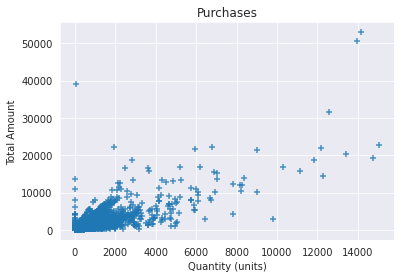

In [54]:
# Correlation graph quantity & total_sales_amount
sns.set_style({'axes.grid' : False})
sns.set_style("darkgrid")
ax = sns.regplot(x=invoices["Quantity"], y=invoices["total_sales_amount"], marker="+", fit_reg=False)
ax.set_title('Purchases')
ax.set(xlabel='Quantity (units)', ylabel='Total Amount')
plt.show()

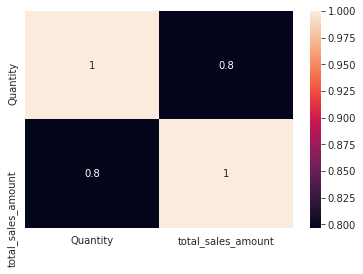

In [55]:
corrMatrix = invoices.corr()
sns.heatmap(corrMatrix, annot=True)

As expected there is a correlation between Quantity and  total sales amount 

Como es de esperarse, existe una correlacion entre `Quantity` y `total_sales_amount`


#### Mayor compra

Sin tener en cuenta el valor atípico

In [56]:
invoices[invoices['total_sales_amount'] == max(invoices['total_sales_amount'])]

,InvoiceNo,Quantity,total_sales_amount
16923,574941,14149,52940.94


Menor compra

In [57]:
invoices[invoices['total_sales_amount'] == min(invoices['total_sales_amount'])]

,InvoiceNo,Quantity,total_sales_amount
14986,570554,1,0.38


In [58]:
np.sqrt(invoices['total_sales_amount'].var())

1208.8679323973786

La desviación estándar es de aproximadamente 1208 Precios unitarios

### Compras Mensuales

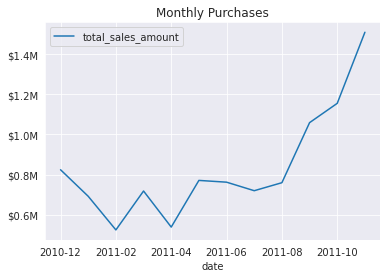

In [59]:
monthly_purchases = (
    online_retail_purchases.groupby(["date"])[["total_sales_amount"]]
    .agg("sum")
    .reset_index()
)
monthly_purchases = monthly_purchases.sort_values(by=["date"])


def millions(x, pos):
    "The two args are the value and tick position"
    return "$%1.1fM" % (x * 1e-6)


formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
monthly_purchases.plot(
    kind="line", x="date", y="total_sales_amount", ax=ax, title="Monthly Purchases"
)
plt.show()

A partir de septiembre las ventas rompen el nivel de 1M

#### Clientes mensuales

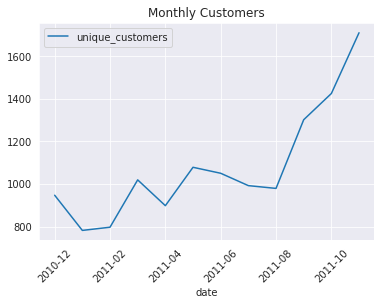

In [60]:
monthly_customers = online_retail.groupby(["date", "CustomerID"]).count().reset_index()
monthly_customers = monthly_customers[["date", "CustomerID"]]
monthly_customers[["date", "unique_customers"]] = (
    monthly_customers.groupby("date")["CustomerID"].count().reset_index()
)

fig, ax = plt.subplots()
monthly_customers.plot(
    kind="line", x="date", y="unique_customers", ax=ax, title="Monthly Customers"
)
plt.xticks(rotation=45)
plt.show()


# Agrupación - (Nivel Cliente)

### Wholesaler VS Minoritary Customers

In [61]:
customers_purchases = (
    online_retail_purchases.groupby(["CustomerID"])[["Quantity", "total_sales_amount"]]
    .agg("sum")
    .reset_index()
)

In [62]:
# Calculate Quantiles
customers_purchases['total_sales_amount'].quantile([.25, .5, 0.75,  0.80, 0.90, 0.95 , 0.99])

0.25      304.470
0.50      657.300
0.75     1600.860
0.80     1993.382
0.90     3521.642
0.95     5655.926
0.99    17679.158
Name: total_sales_amount, dtype: float64

In [63]:
# Threshold
threshold = 3500

In [64]:
minority_customers = customers_purchases[
    customers_purchases["total_sales_amount"] <= threshold
]

mayority_customers = customers_purchases[
    customers_purchases["total_sales_amount"] > threshold
]

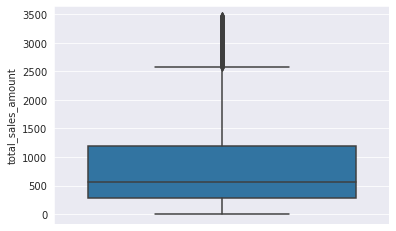

In [65]:
sns.boxplot(y=minority_customers['total_sales_amount'])

In [66]:
minority_customers['total_sales_amount'].quantile([.25, .5, 0.75, 0.99])

0.25     278.7400
0.50     570.1300
0.75    1199.0100
0.99    3299.8928
Name: total_sales_amount, dtype: float64

El precio medio de una compra para un cliente minoritario es 570 (precio unitario), pero hay una alta dispersión según el gráfico.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


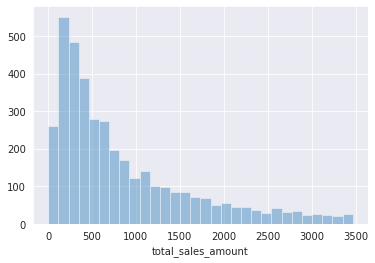

In [67]:
sns.distplot(a=minority_customers['total_sales_amount'], hist=True, kde=False, rug=False )

Una gran mayoría de las compras de minority_customers tiende a ser de 0 a 1000 (precios unitarios) y tiende a disminuir por encima de esa cantidad.

#### Ranking de Clientes

In [68]:
# By total amount spent 
customers_purchases.sort_values(by=['total_sales_amount'], ascending=False)

,CustomerID,Quantity,total_sales_amount
1671,14646,188957,268478.00
4161,18102,61426,248171.76
3692,17450,69273,192988.39
1860,14911,76319,136846.14
54,12415,77374,124914.53
...,...,...,...
4059,17956,1,12.75
2985,16454,3,6.90
1775,14792,2,6.20
3184,16738,3,3.75


### Cancelaciones

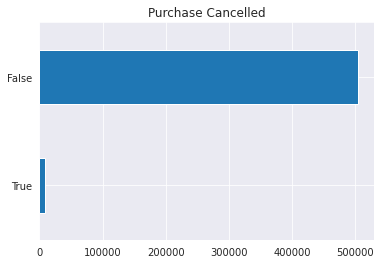

In [69]:
cancelations = online_retail[online_retail["cancelation"] == True]

# Graph with the number of Invoices that are cancelations vs purchases
online_retail.cancelation.value_counts().sort_values().plot(
    kind="barh", title="Purchase Cancelled"
)

Una pequeña cantidad de las compras son canceladas. 

## Paises 

#### Top 10 - Compras por pais

In [70]:
top_ten_countries = online_retail['Country'].value_counts()
top_ten_countries = top_ten_countries.iloc[0:11]

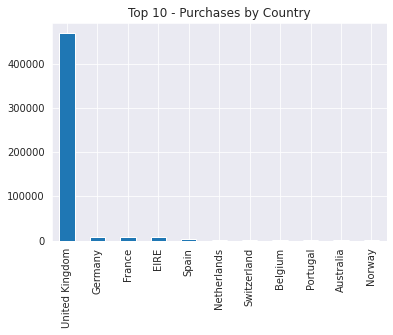

In [71]:
top_ten_countries.plot(kind='bar', title = 'Top 10 - Purchases by Country')

La mayoría de las compras provienen del Reino Unido, pero teniendo en cuenta
ese minorista es de Reino Unido se espera este comportamiento

# Productos 

#### Top 10 productos

Productos más vendidos

In [72]:
products = (
    online_retail_purchases.groupby(["StockCode", "Description"])[["Quantity"]]
    .agg("sum")
    .reset_index()
)

In [73]:
products.sort_values(by=['Quantity'], ascending=False)[0:10]

,StockCode,Description,Quantity
2123,23166,MEDIUM CERAMIC TOP STORAGE JAR,77826
3126,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53680
3617,85099B,JUMBO BAG RED RETROSPOT,47369
3637,85123A,WHITE HANGING HEART T-LIGHT HOLDER,36845
448,21212,PACK OF 72 RETROSPOT CAKE CASES,35960
3414,84879,ASSORTED COLOUR BIRD ORNAMENT,35131
1129,22197,POPCORN HOLDER,30544
2029,23084,RABBIT NIGHT LIGHT,26477
1405,22492,MINI PAINT SET VINTAGE,26341
1528,22616,PACK OF 12 LONDON TISSUES,25512


## Descriptions WordCloud

In [74]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [75]:
descriptions = online_retail_purchases.Description.str.cat(sep=' ')

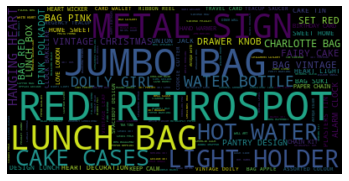

In [76]:
# Start with one review:
text = descriptions

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Al observar la nube de palabras, reafirma que la empresa vende todos los obsequios de ubicación y color `rojo`, `bolsas` son palabras importantes en este contexto

-----------